In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [51]:
# define dataset
df = pd.read_csv('final3.csv')

In [52]:
df.head(5)

,temperature,humidity,methane_concentration,remaining_lifespan
0,32.4,74.0,0.11213,2.944
1,32.5,85.5,0.11214,3.419
2,32.5,84.8,0.11320,3.359
3,32.5,79.2,0.11201,3.170
4,32.5,78.5,0.11675,3.015


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   temperature            814 non-null    float64
 1   humidity               814 non-null    float64
 2   methane_concentration  814 non-null    float64
 3   remaining_lifespan     814 non-null    float64
dtypes: float64(4)
memory usage: 25.6 KB


In [54]:
df.isnull().sum()

temperature              0
humidity                 0
methane_concentration    0
remaining_lifespan       0
dtype: int64

In [55]:
df.duplicated().sum()

0

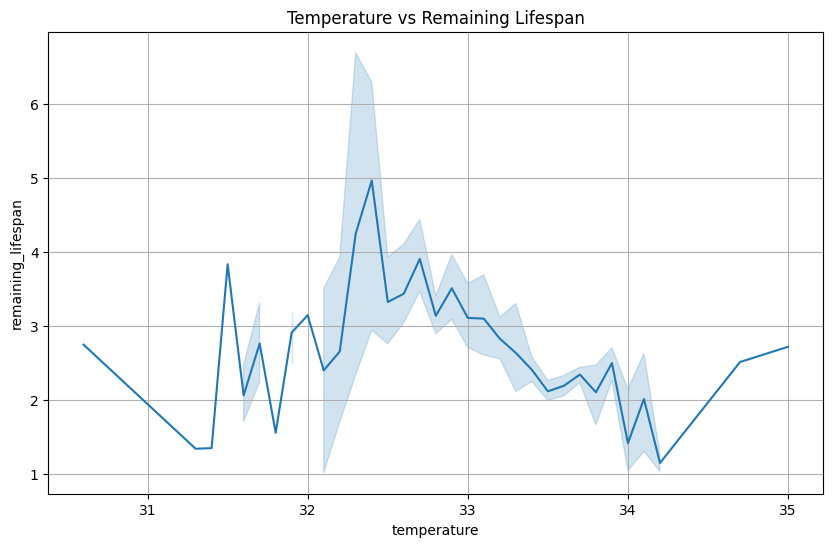

In [79]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['temperature'], y=df['remaining_lifespan'], data=df)
plt.title('Temperature vs Remaining Lifespan')
plt.grid(True)
plt.show()

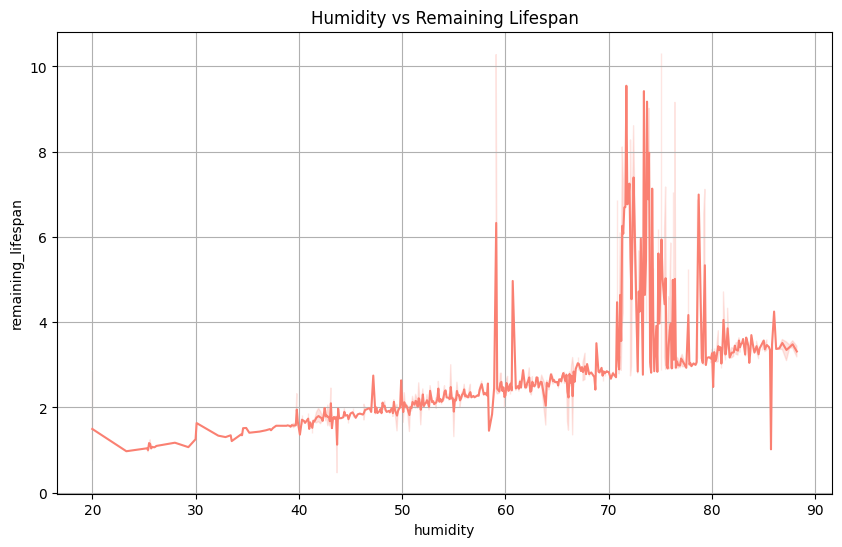

In [84]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['humidity'], y=df['remaining_lifespan'], data=df, color='salmon')
plt.title('Humidity vs Remaining Lifespan')
plt.grid(True)
plt.show()

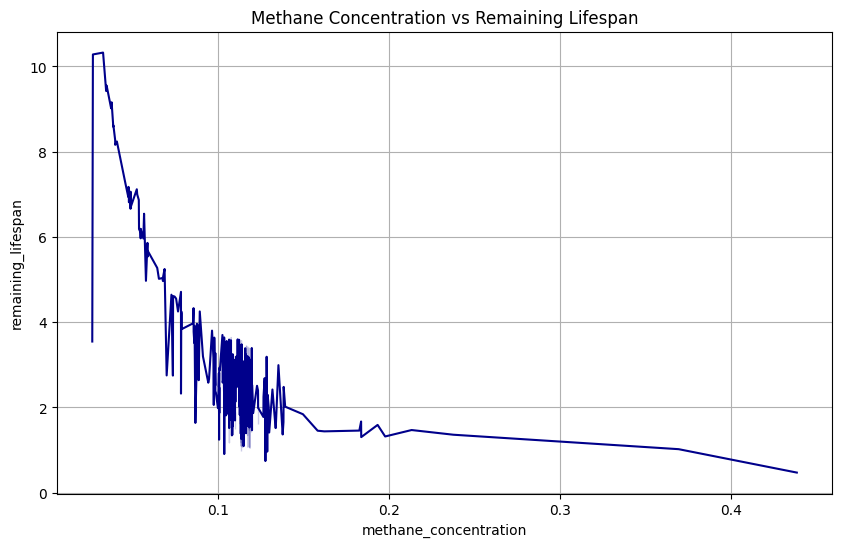

In [85]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['methane_concentration'], y=df['remaining_lifespan'], data=df, color='darkblue')
plt.title('Methane Concentration vs Remaining Lifespan')
plt.grid(True)
plt.show()

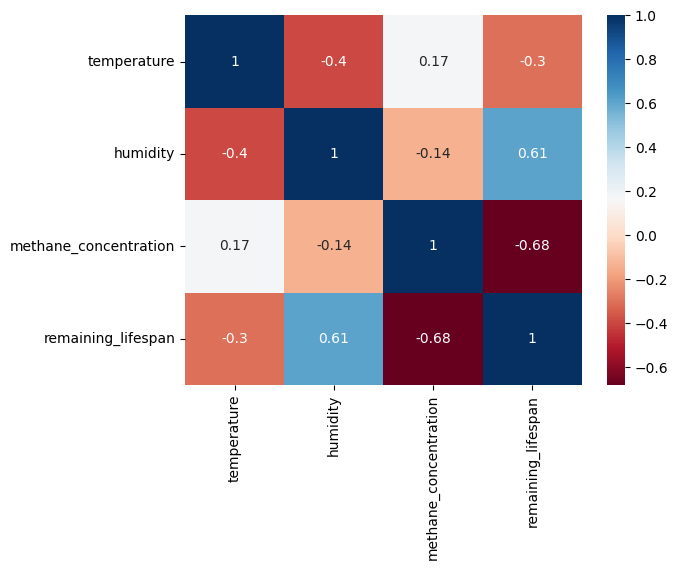

In [56]:
sns.heatmap(df.corr(), annot=True, cmap='RdBu')
plt.show()

In [66]:
X = df.drop(['remaining_lifespan'],axis=1)
y = df['remaining_lifespan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [67]:
# analysing results with different models to select best model
models = {
    'Lasso' : Lasso(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'Support Vector Machine (SVR)': SVR(),
    'K-Nearest Neighbors (KNeighborsRegressor)': KNeighborsRegressor(),
    'Decision Tree (DecisionTreeRegressor)': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor()
}

for name, md in models.items():
    md.fit(X_train,y_train)
    y_pred = md.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} with Mean Squared Error: {mse}")

Lasso with Mean Squared Error: 1.3923977834775958
GradientBoostingRegressor with Mean Squared Error: 0.0332175462656601
Support Vector Machine (SVR) with Mean Squared Error: 1.4980027613305855
K-Nearest Neighbors (KNeighborsRegressor) with Mean Squared Error: 0.8980629884662577
Decision Tree (DecisionTreeRegressor) with Mean Squared Error: 0.07611555214723927
Random Forest Regressor with Mean Squared Error: 0.07113641366871176


In [68]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.03390542453346379


In [71]:
def remaining_lifespan(temperature, humidity, methane_concentration):
    features = pd.DataFrame({
        'temperature': [temperature],
        'humidity': [humidity],
        'methane_concentration': [methane_concentration]
    })

    prediction = model.predict(features) 

    return prediction[0]


In [75]:
temperature = 32.78
humidity = 60
methane_concentration = 0.02345

predict_lifespan = remaining_lifespan(temperature, humidity, methane_concentration)
print("Predicted Lifespan in hours:", predict_lifespan)

Predicted Lifespan in hours: 8.950319587640513


In [88]:
import pickle
pickle.dump(model,open('model1.pkl','wb'))